<a href="https://colab.research.google.com/github/rayhannarindran/fitmotion_model/blob/main/trainingScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

# **Dataset Initiation**

First we load the dataset into a dataframe so it is easier to work with, by getting all the paths to files and concatenating all the data into one dataframe, this dataframe includes all the information about the gyro and also the motion done, with the labels.

In [14]:
# change these following three lines only
reduced = True
operating_system = 'linux' #windows or linux
subject_data_file = 'data_subjects_info.csv'

data_dir = '../data/dataset'
if reduced:
    data_dir += '_reduced'

# List all files in a directory using os.listdir
def get_file_paths(data_dir):
    files = []
    for dirname, _, filenames in os.walk(data_dir):
        for filename in filenames:
            files.append(os.path.join(dirname, filename))
    return files

def get_all_data(file_paths, meta):
    df = pd.DataFrame()

    for p in file_paths:
        print(p)
        if operating_system == 'linux':
            c_dir, c_file = p.split('/')[-2], p.split('/')[-1]
        else:
            c_dir, c_file = p.split('\\')[-2], p.split('\\')[-1]
    
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    df.reset_index(drop=True, inplace=True)
    return df
    
subject_data_frame = pd.read_csv(subject_data_file)
file_paths = get_file_paths(data_dir)
data_frame = get_all_data(file_paths, subject_data_frame)

../data/dataset_reduced/ups_3/sub_1.csv
../data/dataset_reduced/ups_3/sub_24.csv
../data/dataset_reduced/ups_3/sub_22.csv
../data/dataset_reduced/ups_3/sub_9.csv
../data/dataset_reduced/ups_3/sub_2.csv
../data/dataset_reduced/ups_3/sub_23.csv
../data/dataset_reduced/ups_3/sub_20.csv
../data/dataset_reduced/ups_3/sub_11.csv
../data/dataset_reduced/ups_3/sub_13.csv
../data/dataset_reduced/ups_3/sub_10.csv
../data/dataset_reduced/ups_3/sub_6.csv
../data/dataset_reduced/ups_3/sub_3.csv
../data/dataset_reduced/ups_3/sub_14.csv
../data/dataset_reduced/ups_3/sub_16.csv
../data/dataset_reduced/ups_3/sub_4.csv
../data/dataset_reduced/ups_3/sub_8.csv
../data/dataset_reduced/ups_3/sub_5.csv
../data/dataset_reduced/ups_3/sub_19.csv
../data/dataset_reduced/ups_3/sub_15.csv
../data/dataset_reduced/ups_3/sub_12.csv
../data/dataset_reduced/ups_3/sub_17.csv
../data/dataset_reduced/ups_3/sub_18.csv
../data/dataset_reduced/ups_3/sub_7.csv
../data/dataset_reduced/ups_3/sub_21.csv
../data/dataset_reduced/d

In [15]:
# Show the info for dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412865 entries, 0 to 1412864
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1412865 non-null  int64  
 1   gravity.x           1412865 non-null  float64
 2   gravity.y           1412865 non-null  float64
 3   gravity.z           1412865 non-null  float64
 4   userAcceleration.x  1412865 non-null  float64
 5   userAcceleration.y  1412865 non-null  float64
 6   userAcceleration.z  1412865 non-null  float64
 7   subject_id          1412865 non-null  int64  
 8   session_id          1412865 non-null  int64  
 9   category            1412865 non-null  object 
 10  age                 1412865 non-null  int64  
 11  gender              1412865 non-null  int64  
 12  height              1412865 non-null  int64  
 13  weight              1412865 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 150.9+ MB


In [16]:
# Copying dataframe and dropping unnecessary columns
df = data_frame.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412865 entries, 0 to 1412864
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   gravity.x           1412865 non-null  float64
 1   gravity.y           1412865 non-null  float64
 2   gravity.z           1412865 non-null  float64
 3   userAcceleration.x  1412865 non-null  float64
 4   userAcceleration.y  1412865 non-null  float64
 5   userAcceleration.z  1412865 non-null  float64
 6   category            1412865 non-null  object 
dtypes: float64(6), object(1)
memory usage: 75.5+ MB


# **Data Preprocessing**

In [18]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
labels = lEncoder.fit(df.category)
df['code'] = lEncoder.transform(df.category)
df.drop('category', axis=1, inplace=True)
df

,gravity.x,gravity.y,gravity.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code
0,-0.105250,0.975407,0.193659,0.319743,-0.332096,0.136877,4
1,-0.122740,0.970095,0.209403,0.410796,-0.161044,0.162072,4
2,-0.141604,0.967799,0.208119,0.322085,-0.037882,0.068019,4
3,-0.153716,0.965805,0.208787,-0.074738,0.018051,-0.379288,4
4,-0.155612,0.962724,0.221242,-0.003415,-0.068849,-0.104970,4
...,...,...,...,...,...,...,...
1412860,-0.536797,0.602458,-0.590668,-0.151634,0.034764,0.209625,4
1412861,-0.497125,0.641727,-0.583994,-0.079276,-0.223941,0.319391,4
1412862,-0.463856,0.680295,-0.567478,0.023212,-0.117475,0.182590,4
1412863,-0.440328,0.717594,-0.539597,0.102208,0.066174,0.137314,4


In [19]:
# Testing decode
lEncoder.inverse_transform([0, 1, 2, 3, 4, 5])

array(['dws', 'jog', 'sit', 'std', 'ups', 'wlk'], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split

if reduced:
    x_columns = df.iloc[:, 0:6]
    y_columns = df.iloc[:, 6:7]
else:
    x_columns = df.iloc[:, 0:12]
    y_columns = df.iloc[:, 12:13]

trainx, testx, trainy, testy = train_test_split(x_columns, y_columns, test_size=0.2, shuffle=False)
assert(len(trainx) == len(trainy))

In [21]:
# Preview the data
print(trainx.head())
print(trainy.head())
print(testx.head())
print(testy.head())

   gravity.x  gravity.y  gravity.z  userAcceleration.x  userAcceleration.y  \
0  -0.105250   0.975407   0.193659            0.319743           -0.332096   
1  -0.122740   0.970095   0.209403            0.410796           -0.161044   
2  -0.141604   0.967799   0.208119            0.322085           -0.037882   
3  -0.153716   0.965805   0.208787           -0.074738            0.018051   
4  -0.155612   0.962724   0.221242           -0.003415           -0.068849   

   userAcceleration.z  
0            0.136877  
1            0.162072  
2            0.068019  
3           -0.379288  
4           -0.104970  
   code
0     4
1     4
2     4
3     4
4     4
         gravity.x  gravity.y  gravity.z  userAcceleration.x  \
1130292   0.400407   0.408338  -0.820325           -0.006028   
1130293   0.400752   0.408479  -0.820087           -0.004573   
1130294   0.401072   0.408572  -0.819884           -0.005091   
1130295   0.401318   0.408646  -0.819727           -0.002941   
1130296   0.401593 

# **Model Training**

In [22]:
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6 if reduced else 12
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [23]:
from scipy.stats import mode

def sequence_generator(x, y, length, stride):
    seq_x = []
    seq_y = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        target_sequence = y.iloc[i : i + length]
        target_mode = mode(target_sequence.values)[0][0]
        seq_x.append(input_sequence)
        seq_y.append(target_mode)
    return np.array(seq_x), np.array(seq_y)

tx, ty = sequence_generator(trainx, trainy, WINDOW_LENGTH, STRIDE_LENGTH)
vx, vy = sequence_generator(testx, testy, WINDOW_LENGTH, STRIDE_LENGTH)

(113015, 150, 6)
(113015,)


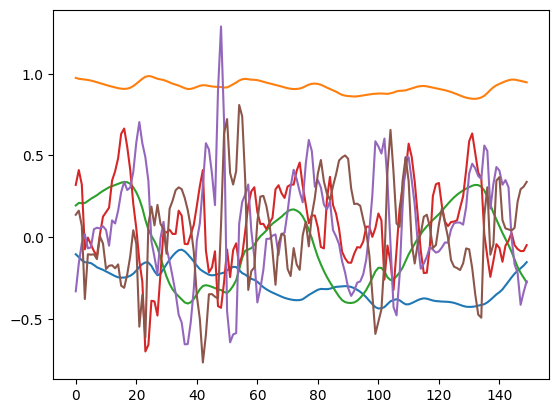

In [24]:
# Training Preview
print(tx.shape)
print(ty.shape)

# Plot the data
import matplotlib.pyplot as plt

plt.plot(tx[0])
plt.show()

In [25]:
from keras.utils import to_categorical

tty = to_categorical(ty, num_classes=NUM_CLASSES)
vvy = to_categorical(vy, num_classes=NUM_CLASSES)

In [26]:
from keras.layers import LSTM, GRU
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.optimizers import Adam

In [30]:

# ! Tambahin Callback, buat testing dan evaluasi
# ! Tambahin F1Score -> Cek apakah model seimbang dengan labelnya
# ! Kurva AUC 

model = Sequential(
    [
        Input(shape=(WINDOW_LENGTH, NUM_FEATURES)),
        LSTM(6, input_shape=(NUM_FEATURES, NUM_FEATURES), return_sequences=True),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ]
)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\rayha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150, 6)         │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 900)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       115,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,558 (455.30 KB)

 Trainable params: 116,558 (455.30 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(tx, tty, validation_data = (vx, vvy), epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE)

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.8794 - loss: 0.3653 - val_accuracy: 0.7403 - val_loss: 0.8902
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.9797 - loss: 0.0668 - val_accuracy: 0.8635 - val_loss: 0.5909
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.9886 - loss: 0.0386 - val_accuracy: 0.7887 - val_loss: 0.9789
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.8504 - val_loss: 0.8634
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9934 - loss: 0.0199 - val_accuracy: 0.8002 - val_loss: 1.2178
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.7478 - val_loss: 1.6244
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.9960 - loss: 0.0118 - val_accuracy: 0.6972 - val_loss: 1.9642
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.9970 -

# **Model Results and Testing**

In [32]:
model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7564 - loss: 2.1007


[1.595241665840149, 0.7965513467788696]

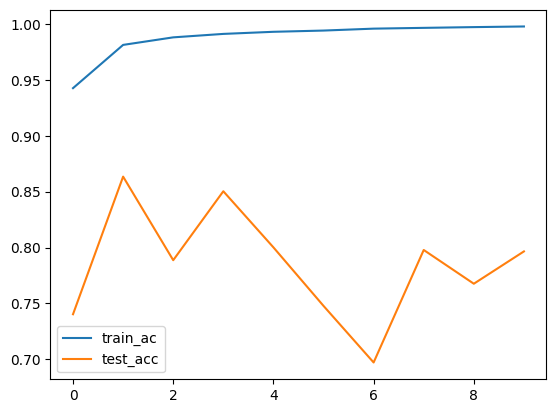

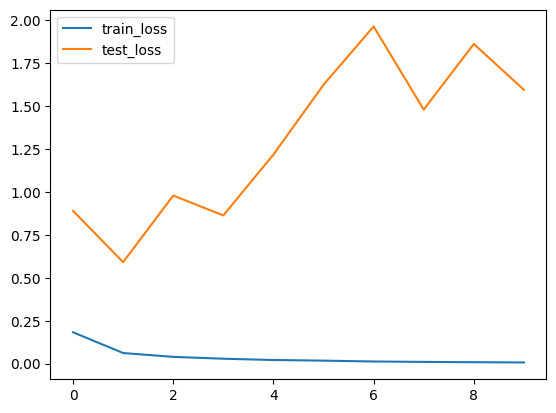

In [33]:
# Accuracy
plt.plot(history.history['accuracy'], label='train_ac')
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

In [6]:
# Saving Model as h5
model_type = 'h5' # or keras

model_url = '../models/fitmotion_model.' + model_type
if reduced:
    model_url = '../models/fitmotion_model_reduced.' + model_type

model.save(model_url)

NameError: name 'reduced' is not defined